In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/myopia.csv"
MyopiaData = pd.read_csv(url)

In [3]:
MyopiaData.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


Here is our dataset dictionary: https://www.umass.edu/statdata/statdata/data/myopia.pdf

#### We are interested in finding out what contributes to Myopia the most. My grandmother always told me not to watch TV or play with computer. Her hypothesis was that they will cause Myopia. (She was strangely fine with studying!). It sounds like Drs share the same point of view with my grandmother " http://www.allaboutvision.com/conditions/myopia.htm "

#### We are DataScientist and don't trust our grandmothers or DRs unless we find the same result! Now, let's go and explore Myopia!




In [4]:
# Year of study and id should not affect anything so we disregard them in this study. 
# we consider two types of inputs - first all general inputs - i.e. physical and external inputs
# second only external inputs
X1 = MyopiaData[['SPHEQ','AL','ACD','LT','VCD','AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
y = MyopiaData['MYOPIC']


Run your regression line on X1 and interpret your MOMMY AND DADMY coefficients. Assume variables are significant. 

In [5]:
lm = LogisticRegression(solver = 'newton-cg', max_iter = 10000)
lm.fit(X1, y)
print(zip(X1.columns.values, lm.coef_[0, :]))
print(lm.intercept_)

[('SPHEQ', -3.4114848074587307), ('AL', 0.015065965598337812), ('ACD', 0.7641730167304045), ('LT', -0.44270402800075204), ('VCD', -0.28863399141622037), ('AGE', -0.0069140603567192033), ('GENDER', 0.50381719268250436), ('SPORTHR', -0.047423567735703775), ('READHR', 0.0974100564783488), ('COMPHR', 0.049020413221919176), ('STUDYHR', -0.131226643021705), ('TVHR', -0.0042628376562762367), ('DIOPTERHR', -0.0076717708427167493), ('MOMMY', 0.63964888621557436), ('DADMY', 0.71626822301926207)]
[ 2.34297362]


It sounds like genetics affects Myopia significantly. Odds of Myopia increases 63.9% and 71.2% with positive case of myopia for Mothers and Fathers respectively. 

#### Use confusion matrix and estimate False negative rate and False positive rate

In [6]:
def Not_Confusion_Matrix(confmat, ErrType):
    TP = confmat[0,0] #True Positive
    FP = confmat[1,0] #False Positive
    FN = confmat[0,1] #False Negative
    TN = confmat[1,1] #True Negative
    if ErrType == 'Err':
        return float(FP + FN)/(FP + FN + TP + TN)
    elif ErrType == 'Acc':
        return float(TP + TN)/(FP + FN + TP + TN)
    elif ErrType == 'FPR':
        return float(FP)/(FP + TN)
    elif ErrType == 'TNR':
        return float(TN)/(FP + TN)
    elif ErrType == 'TPR':
        return float(TP)/(FN + TP)
    elif ErrType == 'FNR':
        return float(FN)/(FN + TP)
    else:
        print("You must input 'Err', 'Acc', 'FPR', 'TNR', 'TPR', or 'FNR' as your input")
        return "NaN"

In [7]:
from sklearn.metrics import confusion_matrix
y_hat = lm.predict(X1)
conf_mat = confusion_matrix(y, y_hat)

In [8]:
print("False Negative Rate is %f" %(Not_Confusion_Matrix(conf_mat, 'FNR')))
print("False Positive Rate is %f" %(Not_Confusion_Matrix(conf_mat, 'FPR')))


False Negative Rate is 0.024209
False Positive Rate is 0.654321


#### Use 10-fold cross-validation to measure accuracy of your predictions

In [9]:
print(cross_val_score(lm, X1, y,cv=10).mean()) 

0.883521358482


#### In your dataset, what percentage of cases are myopic?

In [10]:
MyopiaData['MYOPIC'].mean() # only 13 percent

0.13106796116504854

#### Based on the result you found above, is your prediction precision good or bad?

Answer: It is not too impressive. If you would predict no one was myopic, your error would be 13.1% with your current model your error is 11.7%. 

#### Imagine you would like to decrease your False Positive Rate. Change threshhold and show how FPR, FNR, and total error change by changing Threshhold.

In [11]:
def PredictThreshhold(Predictprob, Threshhold): 
        y_predict = 0
        if (Predictprob >= Threshhold):
            y_predict = 1
        return y_predict

In [12]:
y_hat_probability = lm.predict_proba(X1).T[1]
ThreshholdRange =  np.linspace(0, 1, 100)

In [13]:
FPR_List = []
FNR_List = []
TPR_List = []
Err_List = []

for i in ThreshholdRange:
    y_hat_predict_threshhold = []
    for j in range(0,len(y_hat_probability)):
            y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[j],i))
            
    confmat = confusion_matrix(y, y_hat_predict_threshhold)
    FPR_List.append(Not_Confusion_Matrix(confmat, 'FPR'))
    FNR_List.append(Not_Confusion_Matrix(confmat, 'FNR'))
    Err_List.append(Not_Confusion_Matrix(confmat, 'Err'))
    TPR_List.append(Not_Confusion_Matrix(confmat, 'TPR'))

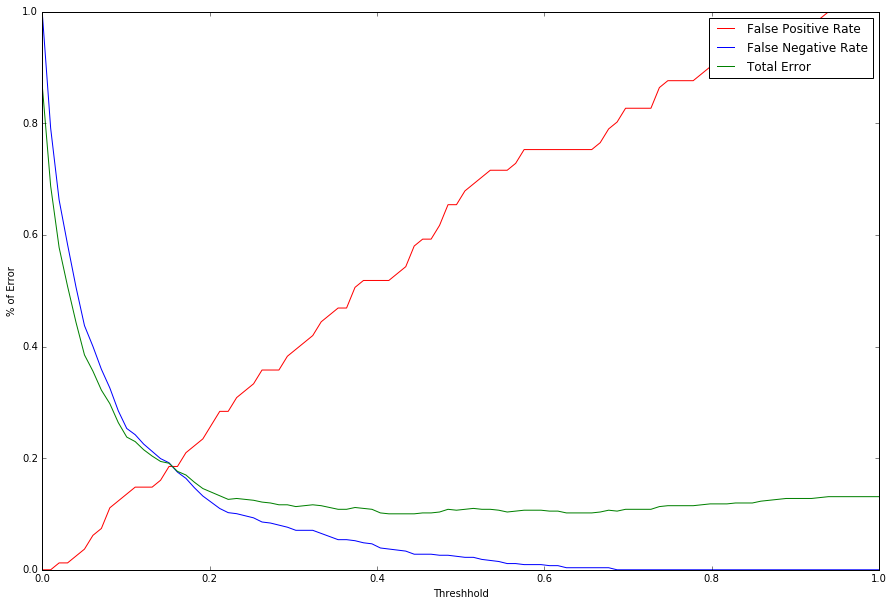

In [15]:
plt.figure(figsize=(15,10))


plt.plot(ThreshholdRange, FPR_List, color = 'r', label = 'False Positive Rate')
plt.plot(ThreshholdRange, FNR_List, color = 'b', label = 'False Negative Rate')
plt.plot(ThreshholdRange, Err_List, color = 'g', label = 'Total Error')
plt.xlabel("Threshhold")
plt.ylabel("% of Error")
plt.legend()
plt.show()

Answer: You need easily reduce your Threshhold up to 0.2 wihtout harming Total Error that much. By doing that, you can signifcantly reduce FPR - of course that comes with the cost of increasing FNR. 

#### Now let's run a logistic regression line on X2 and see if we can confirm our Grandmothers' claims! Use StatsModels api.

In [16]:
import statsmodels.api as sm
MyopiaData['Intercept'] = 1
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY', 'Intercept']]
y = MyopiaData['MYOPIC']


logit = sm.Logit(y, X2)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.354054
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      608
Method:                           MLE   Df Model:                            9
Date:                Sun, 10 Jul 2016   Pseudo R-squ.:                 0.08846
Time:                        20:22:16   Log-Likelihood:                -218.81
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 2.700e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AGE            0.2744      0.193      1.423      0.155        -0.104     0.652
GENDER         0.4241      0.265      1.599      0.110        -0.096     0.944
SPORTHR       -0.0425      0.018     -2.329      0.020        -0.078    -0.007
READHR         0.0896   6.01e+05   1.49e-07      1.000     -1.18e+06  1.18e+06
COMPHR         0.0295   4.01e+05   7.37e-08      1.000     -7.85e+05  7.85e+05
STUDYHR       -0.1104   6.01e+05  -1.84e-07      1.000     -1.18e+06  1.18e+06
TVHR           0.0048      2e+05   2.38e-08      1.000     -3.93e+05  3.93e+05
DIOPTERHR      0.0015      2e+05   7.45e-09      1.000     -3.93e+05  3.93e+05
MOMMY          0.8701      0.262      3.317      0.001         0.356     1.384
DADMY          1.0250      0.265      3.864      0.000         0.505     1.545
Intercept     -4.7493      1.287     -3.689      0.000        -7.273    -2.226
==============================================================================
"""

#### Interpret your results specifically on StudyHr, TVH, and COMPHR: 

It seems like keeping everything else constant: TVH, and StudyHr and COMPHR  - Not only are not significant but also if were significant only marginally would affect odds of Myopia.  

#### Now it's time for regularization and choosing the best predictors:

In [17]:
#Let's first standardize our data - use X1
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

NameOfVariables = ['SPHEQ','AL','ACD','LT','VCD','AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']
for i in NameOfVariables:
    MyopiaData[i] = Standardize(MyopiaData[i])
    
X1 = MyopiaData[NameOfVariables]    

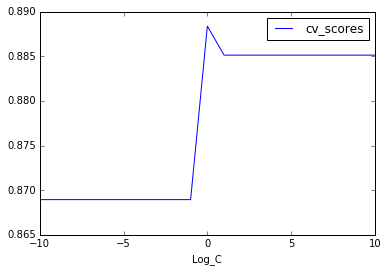

In [18]:
# Try testing and plot using different C as input and l1 penalty
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(lm, X1, y,cv=10).mean())


C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )

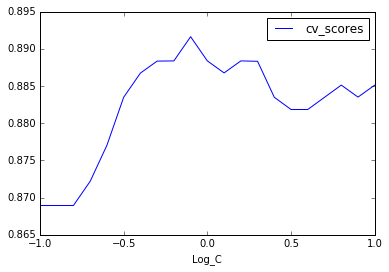

In [19]:
# localize your search around the maximum value you found
c_list = np.logspace(-1,1,21) 
c_index = np.linspace(-1,1,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(lm,X1,y,cv=10).mean())


C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )
# it sounds like our best choice is C = -0.1  (we chose the most restrictive option)

In [20]:
lm = LogisticRegression(C = 10**(-.1), penalty = "l1")
lm.fit(X1,y)
Var_coef = zip(lm.coef_[0,:],NameOfVariables)
sorted(Var_coef)

[(-13.565043558255429, 'SPHEQ'),
 (-0.99777649004690472, 'SPORTHR'),
 (-0.27338410568304483, 'STUDYHR'),
 (0.0, 'AGE'),
 (0.0, 'AL'),
 (0.0, 'COMPHR'),
 (0.0, 'DIOPTERHR'),
 (0.0, 'LT'),
 (0.0, 'TVHR'),
 (0.0, 'VCD'),
 (0.29439376967003572, 'READHR'),
 (0.53042484888224983, 'GENDER'),
 (0.64870567385408184, 'MOMMY'),
 (0.78341473862657784, 'DADMY'),
 (0.99855540724351532, 'ACD')]

#### What is your conclusions about your Grandmothers' and some other Drs' claims?

Answer: It seems like this claim is not that correct! COMPHR, TVHR, did have minimal effect on chance of Myopia while genetics, ACD, and Gender significantly increased the odds of myopia. To our surprise studyhr and sporthr seems to decrease the odds of myopia. I think this is only correct in our dataset. Our dataset is composed of children under 10. May be those who have eyesight issues do not have that much incentive to involve in sports or may have difficulty studying. 

#### Draw ROC curve for your best tuned model. 

In [21]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = lm.predict_proba(X1).T[1]  #T[1] returns probability of belonging to class
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability) 

0.889532611444


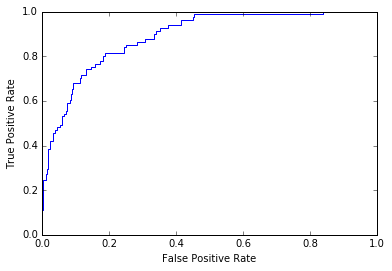

In [22]:
plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
